<a href="https://colab.research.google.com/github/esteban3622/DATATHON---Todos-a-la-U-v2/blob/main/DATATHON_Todos_a_la_U_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Obj. identificar y seleccionar a las empresas colombianas con más reconocimiento en el país a partir de conocer que se dice de ellas en los medios de comunicación.

**El objetivo es identificar *tendencias*, *fechas* y *temáticas* de las noticias con el fin de delimitar el público objetivo y los tópicos a desarrollar en el foro.**

# Carga de información

In [ ]:
# Clonar repositorio desde GitHub
! git clone https://github.com/esteban3622/DATATHON---Todos-a-la-U-v2.git

Cloning into 'DATATHON---Todos-a-la-U-v2'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), 4.32 MiB | 1.84 MiB/s, done.


In [ ]:
import pandas as pd
pd.set_option("display.max_columns", None)

df = pd.read_csv(r"DATATHON---Todos-a-la-U-v2/dataset_Caso_Datathon.csv", encoding= 'utf-8')

# Exploración del Dataset

In [ ]:
df.sample(3)

,Titulo,Fecha Publicacion,Resumen,Empresa,Fuente,Contenido,Tags,Tema,Autor,Unnamed: 9,Unnamed: 10
845,¡No existe subsidio a la gasolina!,9/26/2022 0:00,NaN,Netatear,Petefus,"Las familias de estratos 1, 2 y 3 pagan sus se...",[],COLUMNISTAS,LUIS GUILLERMO VÉLEZ ÁLVAREZ,NaN,NaN
1695,Empobrécelos y reinarás,10/27/2022 0:00,Un camino similar al de Chávez parecen estar s...,Diszadiex,Pádinoqui,El difunto dictador Hugo Chávez alguna vez señ...,NaN,COLUMNISTAS,ALFREDO RANGEL,NaN,NaN
1769,Gerard Piqué programa visita a sus hijos tras ...,4/19/2023 0:00,Shakira ya viajó a Miami para fijar allí su re...,Bagoa,Pádinoqui,Era cuestión de tiempo que Shakira abandonara ...,NaN,FÚTBOL INTERNACIONAL,DEPORTES,NaN,NaN


In [ ]:
df.shape

(3618, 11)

In [ ]:
df.columns

Index(['Titulo', 'Fecha Publicacion', 'Resumen', 'Empresa', 'Fuente',
       'Contenido', 'Tags', 'Tema', 'Autor', 'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3618 entries, 0 to 3617
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Titulo             3617 non-null   object
 1   Fecha Publicacion  3596 non-null   object
 2   Resumen            3412 non-null   object
 3   Empresa            3616 non-null   object
 4   Fuente             3615 non-null   object
 5   Contenido          3568 non-null   object
 6   Tags               713 non-null    object
 7   Tema               3499 non-null   object
 8   Autor              3233 non-null   object
 9   Unnamed: 9         1 non-null      object
 10  Unnamed: 10        1 non-null      object
dtypes: object(11)
memory usage: 311.0+ KB


In [ ]:
df.Empresa.value_counts()

Rodao                         319
Cicadebo                      281
Megotiana                     251
Bagoa                         249
Dofaltachi                    233
Cleasidad                     215
Mobrelí                       199
Cazamalno                     185
Raviettibue                   154
Pugtofu                       154
Cadeem                        142
Corelifai                     141
Netatear                      135
Pristámelo                    130
Jogrator                      129
Mesepau                       128
Ririosísí                     124
Soronioqui                    111
Diszadiex                      84
Refreestor                     67
Insema                         62
Grisatasrres                   62
Feriota                        57
Nevaldali                       2
 Nazareth                       1
 Santa Marta y Valledupar"      1
Name: Empresa, dtype: int64

In [ ]:
df.Tema.unique()

array(['Nación', 'Bolsa', 'Gobierno De Gustavo Petro', 'Bvc', 'Santander',
       'Empresas', 'Economia', 'Economía', 'Cicadebo', 'Cápsula', 'Dólar',
       'Bancos', 'Transporte', 'Tecnología', 'Capsula', 'Finanzas',
       'Política', 'Inflación', 'Pronósticos', 'Financiación',
       'Trabajadoras', 'Crecimiento Económico', 'Estafadores', 'Pib', nan,
       'Cápsulas', 'Macroeconomía', 'Inversionistas', 'Educación',
       'Contenido En Colaboración', 'Especial Bancos', 'Tasas De Interés',
       'Sostenibilidad', 'Denuncia', 'Actualidad',
       'Especial Empresas Que Construyen País', 'Qatar 2022',
       'Servicios Públicos', 'Billeteras Digitales', 'Cadeem',
       'Finanzas Personales', 'Trabajo', 'Billeteras Electrónicas',
       'Robo', 'Multas De Tránsito', 'Comercio', 'Valle',
       'Emprendimiento', 'Contenido en colaboración', 'Campañas De Ayuda',
       'Conectividad', 'Salud', 'Empresas Que Construyen País',
       'Especial Gran Foro Mujeres', 'Empleo',
       'Histor

In [ ]:
df.Fuente.unique()

array(['Rívenmosa', 'Pádinoqui', ' Puerto Estrella y Punta Espada', nan,
       'Petefus', 'Noarema', 'Pensetar', 'Acarcesa'], dtype=object)

# Ajustes y cambio en el dataset

## Eliminación de las últimas dos columnas

In [ ]:
# Eliminar la columna 'Unnamed: 9' y 'Unnamed: 10'
df = df.drop(['Unnamed: 9', 'Unnamed: 10'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3618 entries, 0 to 3617
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Titulo             3617 non-null   object
 1   Fecha Publicacion  3596 non-null   object
 2   Resumen            3412 non-null   object
 3   Empresa            3616 non-null   object
 4   Fuente             3615 non-null   object
 5   Contenido          3568 non-null   object
 6   Tags               713 non-null    object
 7   Tema               3499 non-null   object
 8   Autor              3233 non-null   object
dtypes: object(9)
memory usage: 254.5+ KB


## Ajustes de la información a partir de la columna 'Fecha de Publicación'

In [ ]:
# Convertir la columna 'Fecha' a tipo datetime y manejar errores
df['Fecha Publicacion'] = pd.to_datetime(df['Fecha Publicacion'], errors='coerce')

# Extraer el año, mes y día en columnas separadas
df['Anho'] = df['Fecha Publicacion'].dt.year
df['Mes'] = df['Fecha Publicacion'].dt.month
df['Dia'] = df['Fecha Publicacion'].dt.day

<ipython-input-11-50f976a1128c>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Fecha Publicacion'] = pd.to_datetime(df['Fecha Publicacion'], errors='coerce')


In [ ]:
df.Anho.value_counts().sort_index(ascending=False)

2024.0       2
2023.0    2573
2022.0     617
2021.0     159
2020.0      83
2019.0      41
2018.0      16
2017.0      22
2016.0      20
2015.0      37
2014.0       6
2013.0       1
2012.0       2
2011.0       5
2010.0       5
2009.0       2
2008.0       1
2006.0       1
1999.0       1
Name: Anho, dtype: int64

In [ ]:
# Eliminar filas donde el valor en la columna 'A' sea menor que 3
df = df[df['Anho'] >= 2015]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3570 entries, 0 to 3617
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Titulo             3570 non-null   object        
 1   Fecha Publicacion  3570 non-null   datetime64[ns]
 2   Resumen            3396 non-null   object        
 3   Empresa            3570 non-null   object        
 4   Fuente             3570 non-null   object        
 5   Contenido          3522 non-null   object        
 6   Tags               711 non-null    object        
 7   Tema               3482 non-null   object        
 8   Autor              3215 non-null   object        
 9   Anho               3570 non-null   float64       
 10  Mes                3570 non-null   float64       
 11  Dia                3570 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 362.6+ KB


In [ ]:
df.Anho.value_counts().sort_index(ascending=False)

2024.0       2
2023.0    2573
2022.0     617
2021.0     159
2020.0      83
2019.0      41
2018.0      16
2017.0      22
2016.0      20
2015.0      37
Name: Anho, dtype: int64

## Ajustes columna de Temas

In [ ]:
df.Tema.unique()

array(['Nación', 'Bolsa', 'Gobierno De Gustavo Petro', 'Bvc', 'Santander',
       'Empresas', 'Economia', 'Economía', 'Cicadebo', 'Cápsula', 'Dólar',
       'Bancos', 'Transporte', 'Tecnología', 'Capsula', 'Finanzas',
       'Política', 'Inflación', 'Pronósticos', 'Financiación',
       'Trabajadoras', 'Crecimiento Económico', 'Estafadores', 'Pib', nan,
       'Cápsulas', 'Macroeconomía', 'Inversionistas', 'Educación',
       'Contenido En Colaboración', 'Especial Bancos', 'Tasas De Interés',
       'Sostenibilidad', 'Denuncia', 'Actualidad',
       'Especial Empresas Que Construyen País', 'Qatar 2022',
       'Servicios Públicos', 'Billeteras Digitales', 'Cadeem',
       'Finanzas Personales', 'Trabajo', 'Billeteras Electrónicas',
       'Robo', 'Multas De Tránsito', 'Comercio', 'Valle',
       'Emprendimiento', 'Contenido en colaboración', 'Campañas De Ayuda',
       'Conectividad', 'Salud', 'Empresas Que Construyen País',
       'Especial Gran Foro Mujeres', 'Empleo',
       'Histor

In [ ]:
pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.7 MB/s eta 0:00:00


In [ ]:
df.dropna(subset=['Tema'], inplace=True)

In [ ]:
import pandas as pd
from unidecode import unidecode  # Importar la función unidecode

df.dropna(subset=['Tema'], inplace=True)

# Aplicar las transformaciones a la columna 'Nombres'
df['Tema'] = df['Tema'].str.lower().apply(unidecode)

# Imprimir el DataFrame después de las transformaciones
print("\nDataFrame después de las transformaciones:")
df.Tema.unique()


DataFrame después de las transformaciones:


array(['nacion', 'bolsa', 'gobierno de gustavo petro', 'bvc', 'santander',
       'empresas', 'economia', 'cicadebo', 'capsula', 'dolar', 'bancos',
       'transporte', 'tecnologia', 'finanzas', 'politica', 'inflacion',
       'pronosticos', 'financiacion', 'trabajadoras',
       'crecimiento economico', 'estafadores', 'pib', 'capsulas',
       'macroeconomia', 'inversionistas', 'educacion',
       'contenido en colaboracion', 'especial bancos', 'tasas de interes',
       'sostenibilidad', 'denuncia', 'actualidad',
       'especial empresas que construyen pais', 'qatar 2022',
       'servicios publicos', 'billeteras digitales', 'cadeem',
       'finanzas personales', 'trabajo', 'billeteras electronicas',
       'robo', 'multas de transito', 'comercio', 'valle',
       'emprendimiento', 'campanas de ayuda', 'conectividad', 'salud',
       'empresas que construyen pais', 'especial gran foro mujeres',
       'empleo', 'historias de transformacion', 'comercio electronico',
       'gente', 

## Ajuste con las columnas Resumen y Contenido

In [ ]:
import pandas as pd
from unidecode import unidecode  # Importar la función unidecode

df.dropna(subset=['Contenido'], inplace=True)
df.dropna(subset=['Resumen'], inplace=True)

# Aplicar las transformaciones a la columna 'Nombres'
df['Resumen'] = df['Resumen'].str.lower().apply(unidecode)
df['Contenido'] = df['Contenido'].str.lower().apply(unidecode)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3336 entries, 0 to 3617
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Titulo             3336 non-null   object        
 1   Fecha Publicacion  3336 non-null   datetime64[ns]
 2   Resumen            3336 non-null   object        
 3   Empresa            3336 non-null   object        
 4   Fuente             3336 non-null   object        
 5   Contenido          3336 non-null   object        
 6   Tags               603 non-null    object        
 7   Tema               3336 non-null   object        
 8   Autor              3048 non-null   object        
 9   Anho               3336 non-null   float64       
 10  Mes                3336 non-null   float64       
 11  Dia                3336 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 338.8+ KB


In [ ]:
# Contar cuántas veces se repite la palabra 'Python' en la columna 'Tema'
palabra_a_contar = 'tecnologia'
contador = df['Tema'].str.contains(palabra_a_contar, case=False).sum()

# Imprimir el resultado
print(f"\nLa palabra '{palabra_a_contar}' se repite {contador} veces en la columna 'Tema'.")


La palabra 'tecnologia' se repite 39 veces en la columna 'Tema'.


## Coincidencias de ciertas palabras en las columnas Resumen, Contenido y Temas

In [ ]:
# import re

# texto = "Python es un lenguaje de programación versátil y potente."

# # Palabras a buscar
# palabras_a_buscar = ['Python', 'programación']

# # Utilizando expresiones regulares para buscar las palabras
# for palabra in palabras_a_buscar:
#     coincidencias = re.findall(r'\b' + palabra + r'\b', texto, flags=re.IGNORECASE)
#     print(f'La palabra "{palabra}" aparece {len(coincidencias)} veces.')


In [ ]:
import pandas as pd
import re

# Palabras a buscar
palabras_a_buscar = ['tecnologia','innovacion', 'avances']

# Utilizando expresiones regulares para buscar las palabras en la columna 'Oraciones'
for palabra in palabras_a_buscar:
    coincidencias = df['Contenido'].apply(lambda x: len(re.findall(r'\b' + palabra + r'\b', x, flags=re.IGNORECASE)))
    df[f'{palabra}_coincidencias'] = coincidencias
    coincidencias = df['Resumen'].apply(lambda x: len(re.findall(r'\b' + palabra + r'\b', x, flags=re.IGNORECASE)))
    df[f'{palabra}_coincidencias'] += coincidencias
    coincidencias = df['Tema'].apply(lambda x: len(re.findall(r'\b' + palabra + r'\b', x, flags=re.IGNORECASE)))
    df[f'{palabra}_coincidencias'] += coincidencias

# Imprimir el DataFrame con las nuevas columnas de conteo
# df.avances_coincidencias.sum()
# df.tecnologia_coincidencias.sum()
# df.innovacion_coincidencias.sum()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3336 entries, 0 to 3617
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Titulo                    3336 non-null   object        
 1   Fecha Publicacion         3336 non-null   datetime64[ns]
 2   Resumen                   3336 non-null   object        
 3   Empresa                   3336 non-null   object        
 4   Fuente                    3336 non-null   object        
 5   Contenido                 3336 non-null   object        
 6   Tags                      603 non-null    object        
 7   Tema                      3336 non-null   object        
 8   Autor                     3048 non-null   object        
 9   Anho                      3336 non-null   float64       
 10  Mes                       3336 non-null   float64       
 11  Dia                       3336 non-null   float64       
 12  tecnologia_coinciden

# Solución de preguntas

Basándose en el impacto mediático de las empresas (densidad de noticias) ¿qué empresas considera que estarían más interesadas en contratar una consultoría para entender lo que se habla de ellas en la prensa? Realice un dashboard que soporte su respuesta.

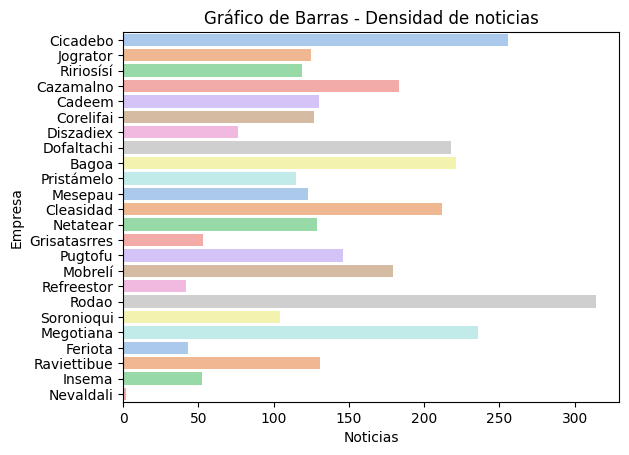

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear un gráfico de barras horizontales con seaborn
sns.countplot(y='Empresa', data=df, palette='pastel')

# Agregar etiquetas y título
plt.xlabel('Noticias')
plt.ylabel('Empresa')
plt.title('Gráfico de Barras - Densidad de noticias')

# Mostrar el gráfico
plt.show()

In [ ]:
print(f'Valor máximo, cantidad de noticias públicadas por empresa: {df.Empresa.value_counts().max()}')
print(f'Valor mínimo, cantidad de noticias públicadas por empresa: {df.Empresa.value_counts().min()}')
print(f'Valor de la mediana, cantidad de noticias públicadas por empresa: {df.Empresa.value_counts().median()}')

Valor máximo, cantidad de noticias públicadas por empresa: 314
Valor mínimo, cantidad de noticias públicadas por empresa: 2
Valor de la mediana, cantidad de noticias públicadas por empresa: 128.0


In [ ]:
# Filtrar con frecuencia superior a un valor definido de la mediana
df.Empresa.value_counts().sort_values(ascending=False)[df.Empresa.value_counts() > df.Empresa.value_counts().median()]

Rodao          314
Cicadebo       256
Megotiana      236
Bagoa          221
Dofaltachi     218
Cleasidad      212
Cazamalno      183
Mobrelí        179
Pugtofu        146
Raviettibue    131
Cadeem         130
Netatear       129
Name: Empresa, dtype: int64

¿Cómo identificaría las empresas que más innovación tecnológica presentan? Desarrolle conceptualmente su respuesta.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3336 entries, 0 to 3617
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Titulo                    3336 non-null   object        
 1   Fecha Publicacion         3336 non-null   datetime64[ns]
 2   Resumen                   3336 non-null   object        
 3   Empresa                   3336 non-null   object        
 4   Fuente                    3336 non-null   object        
 5   Contenido                 3336 non-null   object        
 6   Tags                      603 non-null    object        
 7   Tema                      3336 non-null   object        
 8   Autor                     3048 non-null   object        
 9   Anho                      3336 non-null   float64       
 10  Mes                       3336 non-null   float64       
 11  Dia                       3336 non-null   float64       
 12  tecnologia_coinciden

• Realizar un gráfico que nos permita entender la distribución temporal de las noticias para la empresa ColColombia. ¿Qué podemos inferir del comportamiento de los datos?

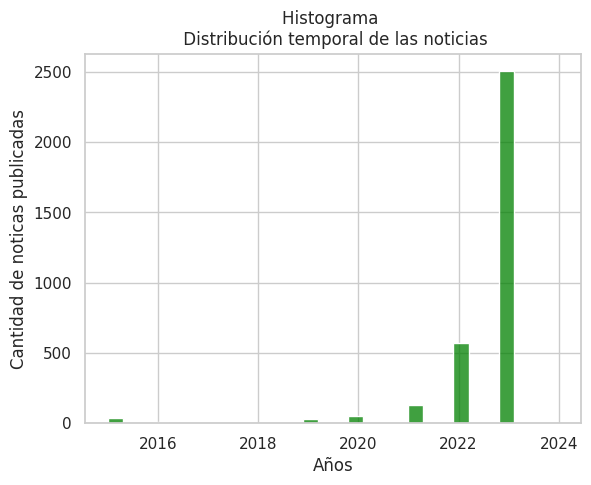

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar estilo de seaborn
sns.set(style='whitegrid')

# Crear un histograma utilizando seaborn
sns.histplot(df.Anho, bins=30, kde=False, color='green')

# Agregar etiquetas y título
plt.xlabel('Años')
plt.ylabel('Cantidad de noticas publicadas')
plt.title('Histograma \n Distribución temporal de las noticias')

# Mostrar el histograma
plt.show()

• ¿Qué temáticas podemos encontrar entre febrero y mayo de 2023? Cite al menos dos formas de desarrollar este punto (aparte de la lectura manual). ¿De qué hablan mayoritariamente los artículos? Justifique su respuesta con un gráfico. La columna fuente contiene el nombre del diario que posteó la noticia ¿qué se puede concluir de la distribución de noticias por periódico? Presente un gráfico que ilustre el punto.

In [ ]:
# Definir el año y los meses específicos a filtrar
anio_filtro = 2023
mes1_filtro = 2  # Febrero
mes2_filtro = 5  # Mayo

# Filtrar el DataFrame por año y meses específicos
df_filtrado = df.loc[(df['Fecha Publicacion'].dt.year == anio_filtro) & (df['Fecha Publicacion'].dt.month.isin([mes1_filtro, mes2_filtro]))]

# Mostrar el DataFrame resultante
df_filtrado

,Titulo,Fecha Publicacion,Resumen,Empresa,Fuente,Contenido,Tags,Tema,Autor,Anho,Mes,Dia,tecnologia_coincidencias,innovacion_coincidencias,avances_coincidencias
135,"“Me dejaron sin nada”, periodista de ‘Noticias...",2023-02-20,"catalina botero, reconocida corresponsal regio...",Dofaltachi,Rívenmosa,"catalina botero, reconocida corresponsal regio...","['Robo', 'Periodista', 'Noticias Dofaltachi', ...",gente,NaN,2023.0,2.0,20.0,0,0,0
136,Óscar Rentería llegaría a importante programa ...,2023-02-20,"durante las ultimas rivenmosas, el nombre del ...",Dofaltachi,Rívenmosa,"durante las ultimas rivenmosas, el nombre del ...","['W Radio', 'Deportes', 'Hernán Peláez']",deportes,NaN,2023.0,2.0,20.0,0,0,0
138,"“Pronto volveré, pero...”, Óscar Rentería revo...",2023-02-20,el experimentado periodista oscar renteria ha ...,Dofaltachi,Rívenmosa,el experimentado periodista oscar renteria ha ...,"['Deportes', 'radio', 'Dofaltachi Radio']",deportes,NaN,2023.0,2.0,20.0,0,0,0
139,Así le fue en rating a Dofaltachi TV con ‘Desa...,2023-02-20,"el regreso del programa, que en 2024 cumple 20...",Dofaltachi,Rívenmosa,"el regreso del programa, que en 2024 cumple 20...","['Dofaltachi Televisión', 'Desafío The Box']",television,NaN,2023.0,2.0,20.0,0,0,0
140,¿Quién falleció? ‘Día a día’ encendió velas en...,2023-02-20,dia a dia se ha consolidado como uno de los pr...,Dofaltachi,Rívenmosa,dia a dia se ha consolidado como uno de los pr...,"['Día a Día', 'Luto', 'muerte']",gente,NaN,2023.0,2.0,20.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3566,Utilidades del Grupo Éxito se redujeron 79 % e...,2023-02-27,"mientras tanto, los ingresos operacionales alc...",Megotiana,Noarema,de acuerdo con el grupo exito sus utilidades s...,NaN,empresas,Noarema,2023.0,2.0,27.0,0,1,0
3567,Así puede comprar boletería en preventa sin es...,2023-02-27,grupo aval ofrece esta opcion a traves de su b...,Megotiana,Noarema,tras el exito en ventas de las primeras fechas...,NaN,tendencias,Noarema,2023.0,2.0,27.0,0,0,0
3568,"Ventas 'online' llegaron a los $15,1 billones ...",2023-05-05,segun el reporte de la camara de comercios ele...,Raviettibue,Noarema,la camara colombiana de comercio electronico (...,NaN,empresas,JOHANA LORDUY\r\nPeriodista Noarema,2023.0,5.0,5.0,1,0,0
3569,"Pizza Sbarro, la nueva marca que estará en las...",2023-05-03,la expansion inicia dentro de sus tiendas alto...,Raviettibue,Noarema,la empresa terpel trae al pais la marca de piz...,NaN,negocios,CONSTANZA GÓMEZ GUASCA\r\nPeriodista de Noarema,2023.0,5.0,3.0,0,0,0


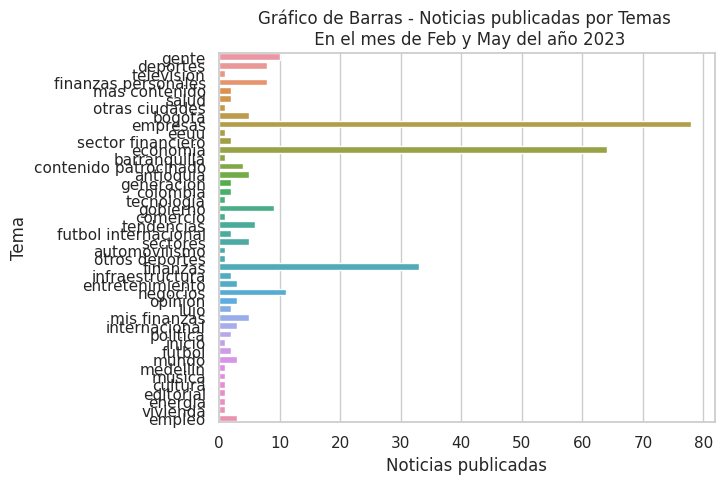

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear un gráfico de barras horizontales con seaborn
sns.countplot(y='Tema', data=df_filtrado)

# Agregar etiquetas y título
plt.xlabel('Noticias publicadas')
plt.ylabel('Tema')
plt.title('Gráfico de Barras - Noticias publicadas por Temas \n En el mes de Feb y May del año 2023')

# Mostrar el gráfico
plt.show()

In [ ]:
# Filtrar con frecuencia superior a un valor definido de la mediana
df_filtrado.Tema.value_counts().sort_values(ascending=False)[df_filtrado.Tema.value_counts() > 10]

empresas    78
economia    64
finanzas    33
negocios    11
Name: Tema, dtype: int64

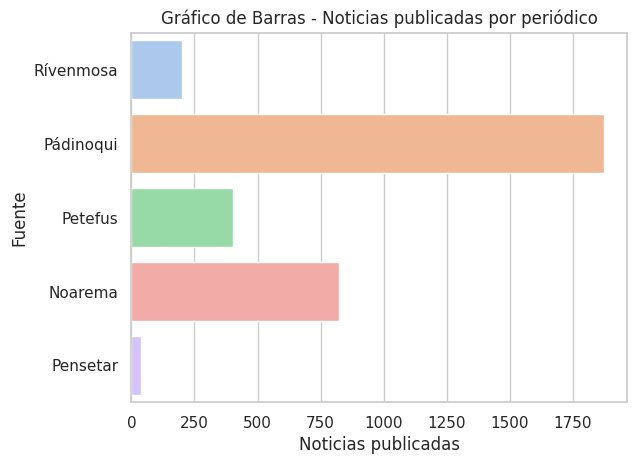

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear un gráfico de barras horizontales con seaborn
sns.countplot(y='Fuente', data=df, palette='pastel')

# Agregar etiquetas y título
plt.xlabel('Noticias publicadas')
plt.ylabel('Fuente')
plt.title('Gráfico de Barras - Noticias publicadas por periódico')

# Mostrar el gráfico
plt.show()

In [ ]:
import pandas as pd

# Crear un DataFrame de ejemplo
datos = {'Grupo': ['A', 'B', 'A', 'B', 'A', 'B'],
         'Valor': [10, 20, 15, 25, 12, 18]}

df = pd.DataFrame(datos)

# Imprimir el DataFrame original
print("DataFrame original:")
print(df)

# Utilizar groupby para agrupar por la columna 'Grupo' y calcular la media para cada grupo
grupo_promedio = df.groupby('Grupo')['Valor'].mean().reset_index()

# Imprimir el resultado
print("\nResultado después de groupby y cálculo de la media:")
print(grupo_promedio)


a. ¿En qué temas de tendencia tecnológicos consideran que estarían interesadas las empresas más grandes del país?